In [ ]:
from google.colab import drive
import sys
import os

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

drive.mount("/content/gdrive")
#Specify path path of the directory
#path = "/content/gdrive/My Drive/Colab Notebooks/econ_indicator"
#sys.path.append(path)
os.chdir('/content/gdrive/My Drive/Colab Notebooks/econ_indicator')

Mounted at /content/gdrive


In [ ]:
# !pwd
!ls

 All_Data_Formatted.xlsx     loss2.xlsx
 basicmodels_2.ipynb	     loss3.xlsx
 breakeven_inflation10.csv   loss_temp.csv
 check.csv		     mortgage_rate30.csv
 consumer_price_index.csv    neural_network.ipynb
 dailysalesexample.ipynb     predicted_sales.csv
'econ 2nd try.ipynb'	     ProphetDerivative.ipynb
 employ_rate.csv	     sales_indicators.csv
 fredgraph.xls		     temp1.csv
 industrial_production.csv   temp.csv
 loss1.csv


In [ ]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
#df = pd.read_csv('sales_indicators.csv',index_col=0)
df = pd.read_excel('All_Data_Formatted.xlsx', skiprows=1,index_col=0)
df['International_Trade']=df['International_Trade'].div(10**8)
df.reset_index(inplace=True)
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['date']=df['date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
df['Holiday'] = df['month'].isin([12])
df.Holiday.sum()

19

In [ ]:
df.replace({False: 0, True: 1}, inplace=True)
df

,date,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,...,employ_rate,indust_prod,mortgage_rate30,Sticky_Price_Cpi,International_Trade,Med_Cpi,CPI,year,month,Holiday
0,2003-01,295248,225575,15441,23073,14565,5794,37740,17807,8565,...,71.590301,91.2395,5.9160,2.787553,974.91,2.181390,76.661168,2003,1,0
1,2003-02,291167,224632,15534,23885,14142,5576,38030,17670,8372,...,71.520526,91.3384,5.8425,2.704659,931.54,1.975830,77.251843,2003,2,0
2,2003-03,296325,227697,15677,23968,14465,5660,38391,17763,8405,...,71.396225,91.0690,5.7450,2.627787,1058.42,1.126212,77.715944,2003,3,0
3,2003-04,295600,226020,15705,22581,14434,5709,38321,17687,8359,...,71.378556,90.4913,5.8125,2.459349,1038.69,0.553037,77.547180,2003,4,0
4,2003-05,296410,226750,15791,21810,14651,5748,38483,17838,8525,...,71.213061,90.4697,5.4840,2.348341,1020.68,1.075788,77.420607,2003,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2021-12,634393,513586,32797,55910,25051,8968,67197,10253,14285,...,70.799610,101.7587,3.0980,3.467011,2578.86,5.275819,117.629537,2021,12,1
228,2022-01,651557,521891,32815,54919,25160,8877,69233,11376,14527,...,70.748899,102.1460,3.4450,3.982988,2479.92,7.141525,118.619340,2022,1,0
229,2022-02,662321,530893,32445,58392,25481,8916,67568,11397,14986,...,70.890307,102.9981,3.7625,4.297858,2349.21,6.506399,119.702806,2022,2,0
230,2022-03,669958,541436,32763,64656,26157,9009,68468,11393,15490,...,71.311622,103.7286,4.1720,4.551815,2965.18,5.902594,121.301004,2022,3,0


In [ ]:
# df.set_index('date', inplace=True)
# df

,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,RSNSR,...,employ_rate,indust_prod,mortgage_rate30,Sticky_Price_Cpi,International_Trade,Med_Cpi,CPI,year,month,Holiday
date,,,,,,,,,,,,,,,,,,,,,
2003-01,295248,225575,15441,23073,14565,5794,37740,17807,8565,16434,...,71.590301,91.2395,5.9160,2.787553,974.91,2.181390,76.661168,2003,1,0
2003-02,291167,224632,15534,23885,14142,5576,38030,17670,8372,16933,...,71.520526,91.3384,5.8425,2.704659,931.54,1.975830,77.251843,2003,2,0
2003-03,296325,227697,15677,23968,14465,5660,38391,17763,8405,16764,...,71.396225,91.0690,5.7450,2.627787,1058.42,1.126212,77.715944,2003,3,0
2003-04,295600,226020,15705,22581,14434,5709,38321,17687,8359,16593,...,71.378556,90.4913,5.8125,2.459349,1038.69,0.553037,77.547180,2003,4,0
2003-05,296410,226750,15791,21810,14651,5748,38483,17838,8525,16722,...,71.213061,90.4697,5.4840,2.348341,1020.68,1.075788,77.420607,2003,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12,634393,513586,32797,55910,25051,8968,67197,10253,14285,95958,...,70.799610,101.7587,3.0980,3.467011,2578.86,5.275819,117.629537,2021,12,1
2022-01,651557,521891,32815,54919,25160,8877,69233,11376,14527,102773,...,70.748899,102.1460,3.4450,3.982988,2479.92,7.141525,118.619340,2022,1,0
2022-02,662321,530893,32445,58392,25481,8916,67568,11397,14986,104095,...,70.890307,102.9981,3.7625,4.297858,2349.21,6.506399,119.702806,2022,2,0


In [ ]:
df.columns

Index(['date', 'RSAFS', 'RSFSXMV', 'RSHPCS', 'RSGASS', 'RSCCAS', 'RSSGHBMS',
       'RSGMS', 'RSDSELD', 'RSMSR', 'RSNSR', 'RSFSDP', 'RSXFS',
       'break_inflate10', 'employ_rate', 'indust_prod', 'mortgage_rate30',
       'Sticky_Price_Cpi', 'International_Trade', 'Med_Cpi', 'CPI', 'year',
       'month', 'Holiday'],
      dtype='object')

In [ ]:
# #break time periods
# #2010-2019 June
# #2019 July-2019 Dec
# df_2010_2019June=df.iloc[84:198,:]
# df_2010_2019June

# df_2010_2018Dec=df.iloc[84:192,:]
# df_2010_2018Dec

df_2010_2019=df.iloc[84:204,:]
df_2010_2019

,date,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,...,employ_rate,indust_prod,mortgage_rate30,Sticky_Price_Cpi,International_Trade,Med_Cpi,CPI,year,month,Holiday
84,2010-01,346043,289245,21187,37399,17351,6507,49844,15585,8363,...,66.750593,89.1936,5.0300,1.177002,1367.25,0.680111,91.422556,2010,1,0
85,2010-02,346835,291032,21199,36950,17402,6412,50538,15507,8251,...,66.709214,89.5089,4.9900,1.054847,1338.98,-0.106628,91.445339,2010,2,0
86,2010-03,354360,293463,21363,37123,17908,6515,50095,15479,8705,...,66.732157,90.1449,4.9675,0.931839,1577.28,-0.286064,91.820840,2010,3,0
87,2010-04,357461,295638,21471,37218,17724,6409,50650,15744,8567,...,66.868325,90.4740,5.0980,0.876030,1531.63,0.452616,91.980322,2010,4,0
88,2010-05,354255,292684,21399,36606,17656,6496,50023,15399,8632,...,66.755470,91.7131,4.8875,0.799868,1561.24,0.275748,92.051625,2010,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08,521158,415426,28580,42735,22615,6740,60074,11369,11045,...,71.435858,102.9086,3.6160,2.633395,2153.85,2.587546,108.244556,2019,8,0
200,2019-09,517755,414270,28600,42589,22376,6698,59377,11042,10997,...,71.722503,102.5790,3.6050,2.616559,2063.62,2.820512,108.329360,2019,9,0
201,2019-10,519519,416179,28809,43254,22417,6742,59662,10969,11156,...,71.687213,101.7775,3.6880,2.734200,2191.58,2.360034,108.577022,2019,10,0
202,2019-11,521774,416055,28576,43246,22184,6532,60033,11109,11255,...,71.676521,102.0979,3.6950,2.760463,1991.87,3.130819,108.518798,2019,11,0


In [ ]:
##########################################prophet starts here
from prophet import Prophet
df_prophet=df_2010_2019.filter(['date','RSAFS','CPI','month'], axis=1)
df_prophet=df_prophet.rename(columns={"date":"ds", "RSAFS":"y", "CPI":"indicator"})

In [ ]:
df_prophet

,ds,y,indicator,month
84,2010-01,346043,91.422556,1
85,2010-02,346835,91.445339,2
86,2010-03,354360,91.820840,3
87,2010-04,357461,91.980322,4
88,2010-05,354255,92.051625,5
...,...,...,...,...
199,2019-08,521158,108.244556,8
200,2019-09,517755,108.329360,9
201,2019-10,519519,108.577022,10
202,2019-11,521774,108.518798,11


In [ ]:
train=df_prophet[(df_prophet['ds']>='2010-01') & (df_prophet['ds']<='2018-12')]
test=df_prophet[(df_prophet['ds']>'2018-12')]

In [ ]:
# m=Prophet(interval_width=0.95,yearly_sesasonlaity=True)
m=Prophet(interval_width=0.95)
m.add_regressor('indicator',standardize=False)
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [ ]:
# # df.reset_index(inplace=True)
# df['date']=pd.to_datetime(df['date'])
# df['date']=df['date'].apply(lambda x: x.strftime('%Y-%m'))
future=df.filter(['date','CPI'], axis=1)
future=future.rename(columns={"date":"ds", "CPI":"indicator"})

In [ ]:
future=future[(future['ds']>='2020-01') & (future['ds']<='2020-12')]

In [ ]:
future

,ds,indicator
204,2020-01,108.840716
205,2020-02,109.139007
206,2020-03,108.901471
207,2020-04,108.173253
208,2020-05,108.175363
209,2020-06,108.767304
210,2020-07,109.317475
211,2020-08,109.662176
212,2020-09,109.814908
213,2020-10,109.860474


In [ ]:
forcast=m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,529721.853575,522907.306872,536232.740051
1,2020-02-01,533447.038597,527114.976025,540799.424988
2,2020-03-01,534935.733761,528319.351070,541625.728562
3,2020-04-01,535808.780574,529432.350913,543688.501889
4,2020-05-01,537068.875795,529941.307264,544681.876618
5,2020-06-01,538548.318672,530328.184808,546445.279397
6,2020-07-01,539962.302750,531823.505517,548396.210312
7,2020-08-01,541650.112742,533738.951411,550611.224760
8,2020-09-01,544983.101269,535845.025048,554506.551951
9,2020-10-01,545454.368753,536507.533000,554576.123501


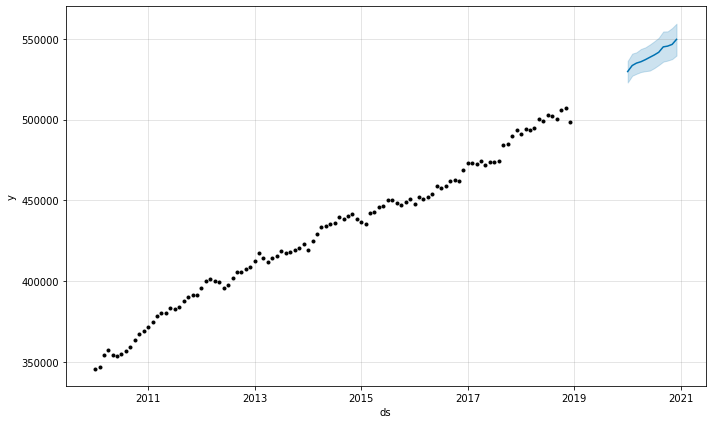

In [ ]:
fig1=m.plot(forcast)

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
cv_results=cross_validation(model=m,initial = pd.to_timedelta(30*12,unit="D"), 
   horizon = pd.to_timedelta(30*12,unit="D"))
df_p=performance_metrics(cv_results)
df_p

INFO:prophet:Making 15 forecasts with cutoffs between 2011-01-12 00:00:00 and 2017-12-06 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish c

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2.238438e+08,14961.408694,6347.349602,0.016014,0.006357,0.016817,0.411765
1,37 days,2.269808e+08,15065.882862,6767.394052,0.016969,0.006847,0.017779,0.352941
2,41 days,2.250817e+08,15002.721940,6636.369268,0.016624,0.006847,0.017440,0.352941
3,42 days,2.247114e+08,14990.377426,6542.816990,0.016404,0.006847,0.017220,0.352941
4,46 days,2.247887e+08,14992.953931,6572.848120,0.016466,0.006847,0.017281,0.352941
...,...,...,...,...,...,...,...,...
141,354 days,8.175146e+08,28592.212539,13317.921893,0.032624,0.010296,0.031476,0.764706
142,355 days,8.224131e+08,28677.745080,13834.960891,0.033670,0.012725,0.032533,0.705882
143,356 days,2.083110e+08,14432.982320,8013.868032,0.018797,0.010296,0.019431,0.764706
144,357 days,2.045210e+08,14301.082284,7656.655158,0.018063,0.010196,0.018689,0.823529


neural network: combine loss results


In [ ]:
sales=['RSAFS', 'RSFSXMV', 'RSHPCS', 'RSGASS', 'RSCCAS', 'RSSGHBMS', 'RSGMS', 'RSDSELD', 'RSMSR', 'RSNSR', 'RSFSDP', 'RSXFS']
econ_indicators=['indust_prod', 'mortgage_rate30', 'International_Trade', 'CPI','Holiday']

#creating combinations of economic indicators
comb0 = ['no_indicator']
comb1 = ['indust_prod', 'mortgage_rate30', 'International_Trade', 'CPI','Holiday']
# comb1 = list(map(lambda el:[el], comb1))

from itertools import combinations
comb2 = list(combinations(econ_indicators, 2))
comb2 = list(map(list, comb2))

comb2_join = []
for x in comb2:
  x_join = '+'.join(x)
  comb2_join.append(x_join)

comb_econ_indicators = comb1+comb2_join
# print(comb_econ_indicators)

In [ ]:
# comb3 = list(combinations(econ_indicators, 3))
# comb3 = list(map(list, comb3))
# comb3_join = []
# for x in comb3:
#   x_join = '+'.join(x)
#   comb3_join.append(x_join)
# print(comb3_join)
# comb_econ_indicators = comb1+comb2_join+comb3_join+comb4_join+comb5
# len(comb_econ_indicators)

['indust_prod+mortgage_rate30+International_Trade', 'indust_prod+mortgage_rate30+CPI', 'indust_prod+mortgage_rate30+Holiday', 'indust_prod+International_Trade+CPI', 'indust_prod+International_Trade+Holiday', 'indust_prod+CPI+Holiday', 'mortgage_rate30+International_Trade+CPI', 'mortgage_rate30+International_Trade+Holiday', 'mortgage_rate30+CPI+Holiday', 'International_Trade+CPI+Holiday']


In [ ]:
# comb4 = list(combinations(econ_indicators, 4))
# comb4 = list(map(list, comb4))
# comb4_join = []
# for x in comb4:
#   x_join = '+'.join(x)
#   comb4_join.append(x_join)
# print(comb4_join)

# comb5 = ['indust_prod+mortgage_rate30+International_Trade+CPI+Holiday']
# comb_econ_indicators = comb3_join+comb4_join+comb5

['indust_prod+mortgage_rate30+International_Trade+CPI', 'indust_prod+mortgage_rate30+International_Trade+Holiday', 'indust_prod+mortgage_rate30+CPI+Holiday', 'indust_prod+International_Trade+CPI+Holiday', 'mortgage_rate30+International_Trade+CPI+Holiday']


In [ ]:
# sales1=['RSAFS', 'RSFSXMV', 'RSHPCS', 'RSGASS']
# sales2=['RSCCAS', 'RSSGHBMS', 'RSGMS', 'RSDSELD']
# sales3=['RSMSR', 'RSNSR', 'RSFSDP', 'RSXFS']

df1 = pd.read_csv('loss_12.csv')
df1 = df1.drop(columns=['Unnamed: 0'])
# df1.shape
df1.columns = comb_econ_indicators
df1.index = sales

df0 = pd.read_csv('loss_0.csv')
df0 = df0.drop(columns=['Unnamed: 0'])
# df1.shape
df0.columns = comb_econ_indicators
df0.index = sales

df_loss012=pd.concat([df1,df2], axis=1)
df_loss012.to_csv("loss012.csv")

# df1 = pd.read_csv('loss1.xlsx')
# df1 = df1.drop(columns=['Unnamed: 0'])
# # df1.shape
# df1.columns = comb_econ_indicators
# df1.index = sales1+sales2+sales3
# df1

ValueError: ignored

In [ ]:
df2 = pd.read_excel('loss2.xlsx')
df2 = df2.drop(columns=['Unnamed: 0'])
df2.columns = comb_econ_indicators
df2.index = sales2
df2

,indust_prod+mortgage_rate30+International_Trade,indust_prod+mortgage_rate30+CPI,indust_prod+mortgage_rate30+Holiday,indust_prod+International_Trade+CPI,indust_prod+International_Trade+Holiday,indust_prod+CPI+Holiday,mortgage_rate30+International_Trade+CPI,mortgage_rate30+International_Trade+Holiday,mortgage_rate30+CPI+Holiday,International_Trade+CPI+Holiday,...,indust_prod+International_Trade,indust_prod+CPI,indust_prod+Holiday,mortgage_rate30+International_Trade,mortgage_rate30+CPI,mortgage_rate30+Holiday,International_Trade+CPI,International_Trade+Holiday,CPI+Holiday,indust_prod+mortgage_rate30+International_Trade+CPI+Holiday
RSCCAS,-220.435550,-153.595481,-185.004054,-201.681296,-172.759178,-216.585988,-232.810149,-183.772765,-202.124297,-220.271079,...,-215.649327,-189.682302,-181.708481,-183.401077,-226.819117,-183.333914,-211.027248,-219.229249,-142.881772,-180.684264
RSSGHBMS,-486.871893,-431.221232,-499.580250,-390.698236,-510.241399,-469.617979,-462.607495,-516.438231,-435.485122,-451.717408,...,-520.895364,-430.339298,-531.247671,-535.879983,-444.420337,-420.672656,-434.166595,-473.880335,-457.111435,-501.311561
RSGMS,-299.473604,-285.529694,-304.303154,-271.753742,-315.155848,-320.912372,-314.212134,-295.485419,-287.808949,-325.966514,...,-312.310988,-315.795223,-307.062992,-274.303834,-350.990045,-336.313285,-248.341961,-290.746571,-288.837847,-317.606029
RSDSELD,-103.533334,-93.001721,-77.766260,-146.858431,-119.832535,-116.479107,-105.522214,-103.765907,-118.294238,-83.874926,...,-105.901634,-85.724993,-115.194814,-111.642475,-171.400416,-133.885038,-118.467931,-98.859995,-57.605191,-119.417698


In [ ]:
df3 = pd.read_excel('loss3.xlsx')
df3 = df3.drop(columns=['Unnamed: 0'])
df3.columns = comb_econ_indicators
df3.index = sales3
df3

,indust_prod+mortgage_rate30+International_Trade,indust_prod+mortgage_rate30+CPI,indust_prod+mortgage_rate30+Holiday,indust_prod+International_Trade+CPI,indust_prod+International_Trade+Holiday,indust_prod+CPI+Holiday,mortgage_rate30+International_Trade+CPI,mortgage_rate30+International_Trade+Holiday,mortgage_rate30+CPI+Holiday,International_Trade+CPI+Holiday,...,indust_prod+International_Trade,indust_prod+CPI,indust_prod+Holiday,mortgage_rate30+International_Trade,mortgage_rate30+CPI,mortgage_rate30+Holiday,International_Trade+CPI,International_Trade+Holiday,CPI+Holiday,indust_prod+mortgage_rate30+International_Trade+CPI+Holiday
RSMSR,-235.151399,-196.099921,-211.226087,-204.670361,-228.884218,-214.371883,-211.227760,-183.963782,-270.708601,-166.359163,...,-221.341678,-235.111585,-153.513896,-212.734335,-200.036699,-232.360811,-192.567721,-204.716437,-252.012877,-219.040723
RSNSR,7.656731,-4.427867,-19.440395,-41.627690,1.235300,-34.678553,-10.488142,-16.423917,-39.769502,-13.127035,...,-24.073192,-41.577457,6.304629,-18.472582,-6.941155,-11.780257,23.067193,-13.919843,-49.487105,1.100445
RSFSDP,-34.675057,-63.906292,-87.457645,-21.630459,-76.888267,7.527882,-81.549644,-67.356190,-56.932024,-61.376574,...,-64.756199,-63.813410,-53.252307,-33.828701,-45.141151,-25.049077,-60.425449,-7.313048,-51.157411,-14.191501
RSXFS,-66.775072,-106.052623,-131.894444,-39.641187,-143.575947,-81.320752,-98.225517,-98.941211,-167.229055,-100.675516,...,-153.469708,-141.970608,-117.404157,-105.022824,-101.735631,-67.523200,-73.686071,-109.745925,-110.758691,-84.568899


In [ ]:
# frames = [df1,df2,df3]
# df_all_sales = pd.concat(frames)
# df_all_sales

,indust_prod+mortgage_rate30+International_Trade,indust_prod+mortgage_rate30+CPI,indust_prod+mortgage_rate30+Holiday,indust_prod+International_Trade+CPI,indust_prod+International_Trade+Holiday,indust_prod+CPI+Holiday,mortgage_rate30+International_Trade+CPI,mortgage_rate30+International_Trade+Holiday,mortgage_rate30+CPI+Holiday,International_Trade+CPI+Holiday,...,indust_prod+International_Trade,indust_prod+CPI,indust_prod+Holiday,mortgage_rate30+International_Trade,mortgage_rate30+CPI,mortgage_rate30+Holiday,International_Trade+CPI,International_Trade+Holiday,CPI+Holiday,indust_prod+mortgage_rate30+International_Trade+CPI+Holiday
RSAFS,-111.317711,-101.887517,-111.016390,-80.626320,-128.086391,-125.033168,-84.303798,-122.301126,-58.773027,-65.824667,...,-137.196850,-66.689364,-96.345695,-93.738486,-89.034200,-90.008771,-90.436907,-87.458143,-112.835767,-126.595371
RSFSXMV,-93.821664,-73.906556,-102.095736,-158.979325,-77.253389,-107.672249,-96.670547,-144.626095,-87.980604,-172.595185,...,-91.582412,-93.317010,-159.409844,-112.687698,-70.548830,-134.802951,-167.410354,-133.272540,-120.717309,-102.643307
RSHPCS,-94.481828,-181.725605,-157.155754,-135.068905,-145.965190,-141.623184,-130.048496,-109.681554,-130.606422,-128.706585,...,-110.169067,-106.310857,-83.406715,-141.077547,-119.876181,-149.642516,-147.129088,-129.848566,-71.963544,-107.580657
RSGASS,-179.203147,-144.880536,-160.399418,-198.968220,-147.249623,-153.035283,-168.348027,-112.073962,-161.284667,-128.517310,...,-138.136325,-211.993759,-115.666347,-126.745516,-126.953551,-160.242147,-92.605934,-128.883924,-136.926042,-166.371093
RSCCAS,-220.435550,-153.595481,-185.004054,-201.681296,-172.759178,-216.585988,-232.810149,-183.772765,-202.124297,-220.271079,...,-215.649327,-189.682302,-181.708481,-183.401077,-226.819117,-183.333914,-211.027248,-219.229249,-142.881772,-180.684264
RSSGHBMS,-486.871893,-431.221232,-499.580250,-390.698236,-510.241399,-469.617979,-462.607495,-516.438231,-435.485122,-451.717408,...,-520.895364,-430.339298,-531.247671,-535.879983,-444.420337,-420.672656,-434.166595,-473.880335,-457.111435,-501.311561
RSGMS,-299.473604,-285.529694,-304.303154,-271.753742,-315.155848,-320.912372,-314.212134,-295.485419,-287.808949,-325.966514,...,-312.310988,-315.795223,-307.062992,-274.303834,-350.990045,-336.313285,-248.341961,-290.746571,-288.837847,-317.606029
RSDSELD,-103.533334,-93.001721,-77.766260,-146.858431,-119.832535,-116.479107,-105.522214,-103.765907,-118.294238,-83.874926,...,-105.901634,-85.724993,-115.194814,-111.642475,-171.400416,-133.885038,-118.467931,-98.859995,-57.605191,-119.417698
RSMSR,-235.151399,-196.099921,-211.226087,-204.670361,-228.884218,-214.371883,-211.227760,-183.963782,-270.708601,-166.359163,...,-221.341678,-235.111585,-153.513896,-212.734335,-200.036699,-232.360811,-192.567721,-204.716437,-252.012877,-219.040723
RSNSR,7.656731,-4.427867,-19.440395,-41.627690,1.235300,-34.678553,-10.488142,-16.423917,-39.769502,-13.127035,...,-24.073192,-41.577457,6.304629,-18.472582,-6.941155,-11.780257,23.067193,-13.919843,-49.487105,1.100445


In [ ]:
# df_all_sales.to_csv("loss_all.csv")
df1.to_csv("loss_4.csv")

In [ ]:
# df_loss1=pd.read_csv('loss_temp.csv')
# df_loss2=pd.read_csv('loss_temp2.csv')
# df_loss1_5=pd.concat([df_loss1, df_loss2], axis=1)
# df_loss1_5.to_csv("loss1_5.csv")